# Solutions

## Spectrum of 3-Hydroxyisonicotinaldehyde

3-Hydroxyisonicotinaldehyde (HINA) has been studied for years as a simple analogue of vitamin B6, but was recently found to also be the smallest green-emissive fluorophore.

In this exercise, we will try to simulate its absorption and emission spectrum.

### TD-HF

In [2]:
import veloxchem as vlx
import gator
import adcc
import multipsi as mtp

import numpy as np
import matplotlib.pyplot as plt

au2ev = 27.211386

def lorentzian(x, y, xmin, xmax, xstep, gamma):
    '''
    Lorentzian broadening function
    
    Call: xi,yi = lorentzian(energies, intensities, start energy, end energy, energy step, gamma)
    '''
    xi = np.arange(xmin,xmax,xstep); yi=np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(x)): yi[i] = yi[i] + y[k] * (gamma/2.) / ( (xi[i]-x[k])**2 + (gamma/2.)**2 )
    return xi,yi

def gaussian(x, y, xmin, xmax, xstep, sigma):
    '''
    Gaussian broadening function
    
    Call: xi,yi = gaussian(energies, intensities, start energy, end energy, energy step, gamma)
    '''
    xi = np.arange(xmin,xmax,xstep); yi=np.zeros(len(xi))
    for i in range(len(xi)): 
        for k in range(len(y)): yi[i] = yi[i] + y[k]*np.e**(-((xi[i]-x[k])**2)/(2*sigma**2))
    return xi,yi

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.
* Warning * Setting MKL_INTERFACE_LAYER to "LP64".
* Warning * Setting MKL_THREADING_LAYER to "INTEL".


In [3]:
benzoquinone_xyz = """
O         -0.00630        0.84270        1.20330
C          1.08140        0.78490        1.76370
C          1.19750        0.37180        3.18690
C          2.33920        1.12460        1.04820
C          2.39020        0.30850        3.80120
C          3.53190        1.06130        1.66250
C          3.64810        0.64820        3.08570
O          4.73580        0.59050        3.64610
H          0.26440        0.12860        3.68740
H          2.22780        1.42340        0.00960
H          2.50170        0.00980        4.83990
H          4.46510        1.30460        1.16200
 """

molecule = vlx.Molecule.read_str(benzoquinone_xyz) 
basis = vlx.MolecularBasis.read(molecule,'6-31G')

# Perform SCF calculation
scf_gs = vlx.ScfRestrictedDriver()
scf_gs.compute(molecule,basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [8]:
rpa_solver = vlx.LinearResponseEigenSolver()
rpa_solver.update_settings({'nstates':5}, {})
rpa_results = rpa_solver.compute(molecule, basis, scf_gs.scf_tensors)

                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 10                                                       
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                               ERI Screening Threshold         : 1.0e-15                                                  
                

* Info * Processing Fock builds... (batch size: 20)                                                                       
* Info *   batch 1/1                                                                                                      
                                                                                                                          
* Info * 40 gerade trial vectors in reduced space                                                                         
* Info * 40 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 2.10 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.26 GB of memory available for the solver on the master node                                                    
                

                                                                                                                          
* Info * 68 gerade trial vectors in reduced space                                                                         
* Info * 68 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 3.40 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.34 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   7 * Residuals (Max,Min): 1.60e-02 and 4.98e-05                                            
                

* Info * Processing Fock builds... (batch size: 6)                                                                        
* Info *   batch 1/1                                                                                                      
                                                                                                                          
* Info * 86 gerade trial vectors in reduced space                                                                         
* Info * 85 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 4.22 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.40 GB of memory available for the solver on the master node                                                    
                

                                                                                                                          
* Info * 89 gerade trial vectors in reduced space                                                                         
* Info * 88 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 4.36 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.40 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   14 * Residuals (Max,Min): 5.06e-04 and 8.17e-06                                           
                

[3.61159009 3.8185157  5.18151596 6.04307305 7.84682256 7.86162122
 8.25133985 8.76850596 8.79094162 8.80451622]
[7.06850265e-12 1.01296491e-09 2.11093970e-09 8.74448771e-01
 1.17128938e-09 8.89236717e-11 1.01576779e-02 2.73343900e-07
 2.02211010e-07 3.44504911e-01]


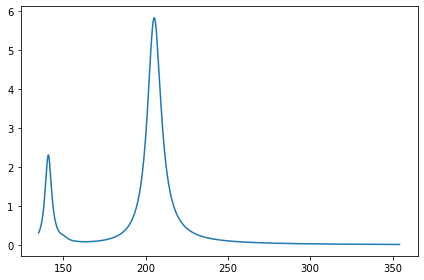

In [10]:
plt.figure(figsize=(6,4))
TDHF_E = au2ev*rpa_results['eigenvalues']
print(TDHF_E)
TDHF_f = rpa_results['oscillator_strengths']
print(TDHF_f)
xi,yi = lorentzian(TDHF_E,TDHF_f,3.5,9.2,0.01,0.3)
plt.plot(1240/xi,yi); plt.tight_layout(); plt.show()

# TD-DFT

In [11]:
# SCF settings and calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_settings = {'conv_thresh': 1.0e-6}
method_settings = {'xcfun': 'b3lyp'}
scf_drv.update_settings(scf_settings,method_settings)
scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [12]:
tddft_solver = vlx.TDAExciDriver()
tddft_solver.update_settings({'nstates':5}, {})
tddft_results = tddft_solver.compute(molecule, basis, scf_drv.scf_tensors)

                                                                                                                          
                                                     TDA Driver Setup                                                     
                                                                                                                          
                               Number of States                : 4                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                               ERI Screening Threshold         : 1.0e-15                                                  
                

[509.48583839 466.13350535 309.49675156 230.19766641]
[1.15287243e-11 5.21665856e-10 1.01347782e-10 3.74943443e-01]


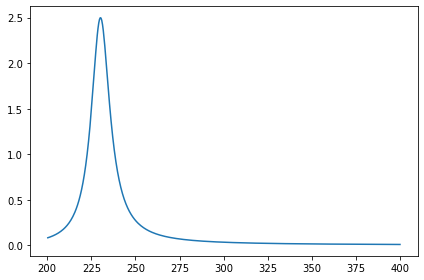

In [33]:
plt.figure(figsize=(6,4))
TDDFT_E = au2ev*tddft_results['eigenvalues']
print(1240/TDDFT_E)
TDDFT_f = tddft_results['oscillator_strengths']
print(TDDFT_f)
xi,yi = lorentzian(TDDFT_E,TDDFT_f,3.1,6.2,0.01,0.3)
plt.plot(1240/xi,yi); plt.tight_layout(); plt.show()

## MCSCF

In [ ]:
viewer = mtp.OrbitalViewer()
viewer.plot(molecule,basis,scf_gs.mol_orbs)

In [31]:
# We choose the pi orbitals + the C=O and N lone pair => indices 26 28 29 30 31 32 33 34 36 41
# We can skip the pointless OH lone pair (23) to reduce things a bit
space=mtp.OrbSpace(molecule,"hina-cas.h5")
mcscfdrv = mtp.McscfDriver()
mcscfdrv.compute(molecule,basis,space,4) # 1 ground state + 3 excited states

SI=mtp.InterState()
sa_mcscf_results = SI.diposc(molecule,basis,mcscfdrv.CIVecs)


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 26
Number of active orbitals:              10
Number of virtual orbitals:             55

    This is a CASSCF wavefunction: CAS(12,10)

          CI expansion:
          -------------
Number of determinants:      22155


                                                                                                                          
        MCSCF Iterations
        ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | CI Iter. |   Time
     ---------------------------------------------------------------------
        1     -434.071250745     0.0e+00      8.2e-02          9   0:00:02
        2     -434.072813226    -1.6e-03      1.7e-02          9   0:00:02
        3     -434.072920893    -1.1e-04      4.4e-03         11   0:00:0

                                                                                                                          
Total MCSCF time: 00:00:30
                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2        3.64306         8.479603e-06    1.890874e-06
     1       3        4.75008         2.837303e-02    2.067198e-02
     1       4        4.92132         9.434315e-03    3.943086e-02


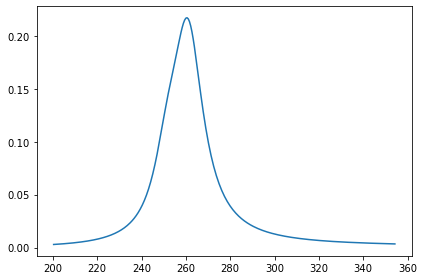

In [33]:
plt.figure(figsize=(6,4))
MCSCF_E = au2ev*sa_mcscf_results['energies']
MCSCF_f = sa_mcscf_results['oscillator_strengths']
xi,yi = lorentzian(MCSCF_E,MCSCF_f,3.5,6.2,0.01,0.3)
plt.plot(1240/xi,yi); plt.tight_layout(); plt.show()

                                                                                                                          
                                                     TDA Driver Setup                                                     
                                                                                                                          
                               Number of States                : 4                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                               ERI Screening Threshold         : 1.0e-15                                                  
                

                   *** Iteration:   9 * Reduced Space:   36 * Residues (Max,Min): 2.06e-04 and 6.01e-09                   
                                                                                                                          
                   State  1: 0.12072597 a.u. Residual Norm: 0.00000001                                                    
                   State  2: 0.14665631 a.u. Residual Norm: 0.00000004                                                    
                   State  3: 0.16139205 a.u. Residual Norm: 0.00000151                                                    
                   State  4: 0.20023615 a.u. Residual Norm: 0.00020594                                                    
                                                                                                                          
                   *** Iteration:  10 * Reduced Space:   40 * Residues (Max,Min): 3.94e-05 and 6.91e-10                   
                